# Import lib


In [13]:
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [2]:
train_path = 'archive/colored_images_mod/train'
test_path = 'archive/colored_images_mod/test'

In [3]:
classes = glob('archive/colored_images_mod/train/*')

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Resnet50

In [18]:
# create empty model
resnet_model = Sequential()

# import resnet50
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

# add layers
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(521, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [19]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 2048)              0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 521)               1067529   
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 5)                 2610      
Total params: 24,657,851
Trainable params: 1,070,139
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
epochs=20
history = resnet_model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/20
46/46 [==============================] - 40s 804ms/step - loss: 2.2733 - accuracy: 0.4370 - val_loss: 1.2620 - val_accuracy: 0.4939
Epoch 2/20
46/46 [==============================] - 35s 755ms/step - loss: 1.2416 - accuracy: 0.5391 - val_loss: 1.1678 - val_accuracy: 0.6276
Epoch 3/20
46/46 [==============================] - 36s 772ms/step - loss: 1.1525 - accuracy: 0.5749 - val_loss: 1.0203 - val_accuracy: 0.6071
Epoch 4/20
46/46 [==============================] - 36s 788ms/step - loss: 1.1656 - accuracy: 0.5705 - val_loss: 1.0800 - val_accuracy: 0.5593
Epoch 5/20
46/46 [==============================] - 36s 772ms/step - loss: 1.1523 - accuracy: 0.5736 - val_loss: 1.1263 - val_accuracy: 0.6330
Epoch 6/20
46/46 [==============================] - 35s 746ms/step - loss: 1.1219 - accuracy: 0.5988 - val_loss: 1.0250 - val_accuracy: 0.6930
Epoch 7/20
46/46 [==============================] - 35s 768ms/step - loss: 1.1201 - accuracy: 0.6060 - val_loss: 0.9651 - val_accuracy: 0.6958

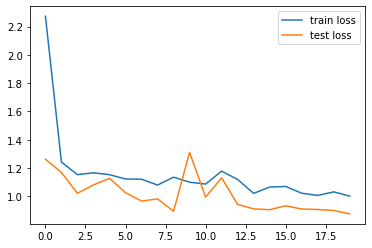

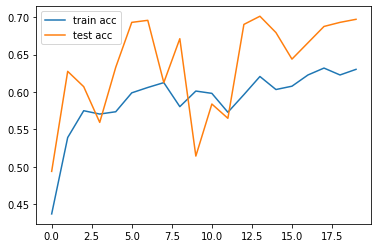

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()